In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the data

In [2]:
train = pd.read_csv('C:\\New folder\\train.csv')
test = pd.read_csv('C:\\New folder\\test.csv')

# Performing EDA on Training data.

In [3]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
total = train.isnull().sum().sort_values(ascending=False)

In [7]:
percent = train.isnull().sum()/train.isnull().count().sort_values(ascending=False)

In [8]:
missing_values = pd.concat([total,percent*100],axis=1, keys=["Total","Percent"])
missing_values

,Total,Percent
Credit_History,50,8.143322
Self_Employed,32,5.211726
LoanAmount,22,3.583062
Dependents,15,2.442997
Loan_Amount_Term,14,2.280130
Gender,13,2.117264
Married,3,0.488599
Loan_ID,0,0.000000
Education,0,0.000000
ApplicantIncome,0,0.000000


In [9]:
train["Gender"] = train["Gender"].fillna(train["Gender"].dropna().mode().values[0])

In [10]:
train["Married"] = train["Married"].fillna(train["Married"].dropna().mode().values[0])

In [11]:
train["Credit_History"] = train["Credit_History"].fillna(
train["Credit_History"].dropna().mode().values[0])

In [12]:
train["Self_Employed"] = train["Self_Employed"].fillna(
train["Self_Employed"].dropna().mode().values[0])

In [13]:
train["LoanAmount"] = train["LoanAmount"].fillna(
train["LoanAmount"].dropna().median())

In [14]:
train["Dependents"] = train["Dependents"].fillna(
train["Dependents"].dropna().mode().values[0])

In [15]:
train["Loan_Amount_Term"] = train["Loan_Amount_Term"].fillna(
train["Loan_Amount_Term"].dropna().mode().values[0])

In [16]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [17]:
train["Dependents"].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [18]:
train.duplicated().sum()

0

# Droping unecessary Columns from train data.

In [19]:
train.drop(columns = ['Loan_ID'],axis=1,inplace=True)
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Data Visualization..

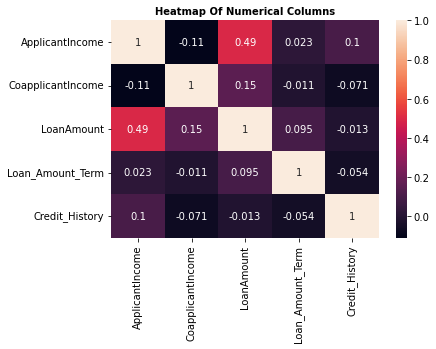

In [20]:
# correlation Between numerical columns...

test_numerical = test[['Dependents','ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']]

sns.heatmap(test_numerical.corr(), annot=True)
plt.title('Heatmap Of Numerical Columns', fontsize=10, fontweight='bold')
plt.show()

# Univariate Analysis

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

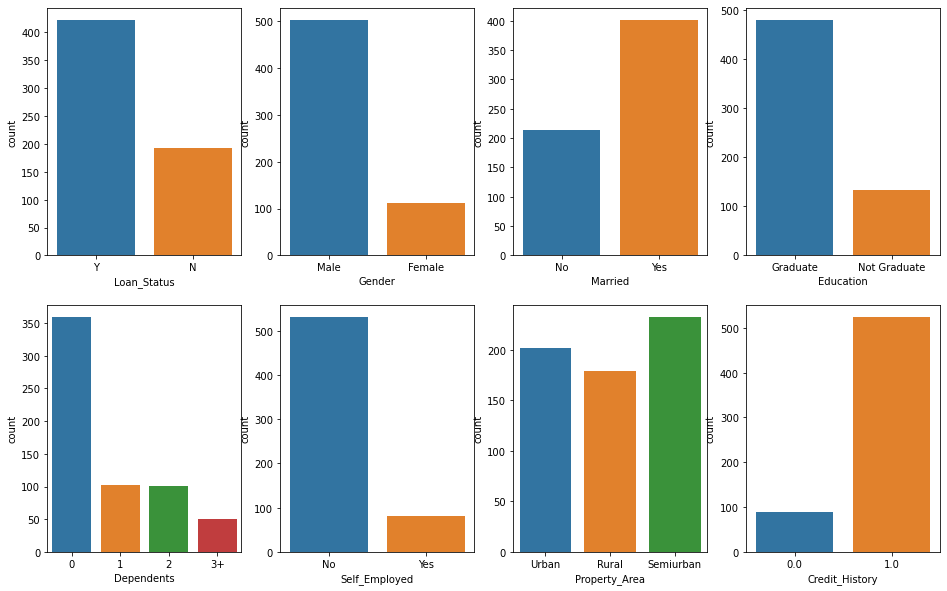

In [21]:
fig, ax = plt.subplots(2,4, figsize=(16,10))

sns.countplot(x='Loan_Status', data = train, ax=ax[0][0])
sns.countplot(x='Gender', data=train, ax=ax[0][1])
sns.countplot(x='Married', data=train, ax=ax[0][2])
sns.countplot(x='Education', data=train, ax=ax[0][3])
sns.countplot(x='Dependents', data=train, ax=ax[1][0])
sns.countplot(x='Self_Employed', data=train, ax=ax[1][1])
sns.countplot(x='Property_Area', data=train, ax=ax[1][2])
sns.countplot(x='Credit_History', data=train, ax=ax[1][3])

<AxesSubplot:xlabel='Education', ylabel='count'>

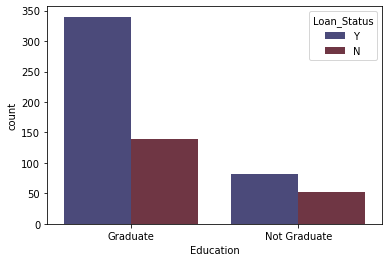

In [22]:
# Education and Loan Status

sns.countplot(x="Education", hue = "Loan_Status", data = train, palette="icefire")

<AxesSubplot:xlabel='Gender', ylabel='count'>

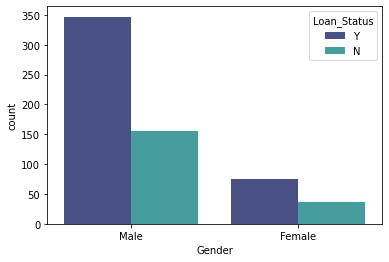

In [23]:
# Gender and Loan status

sns.countplot(x = "Gender" , hue = "Loan_Status", data= train, palette= "mako")

<AxesSubplot:xlabel='Married', ylabel='count'>

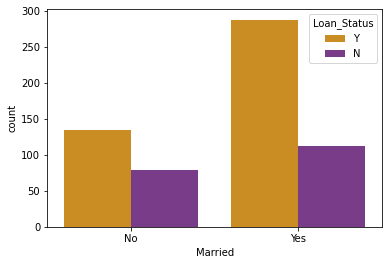

In [24]:
# Marital status and Loan Status

sns.countplot(x = "Married" , hue = "Loan_Status", data= train, palette= "CMRmap_r")

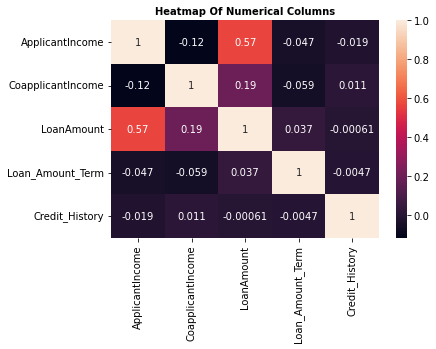

In [25]:
# correlation Between numerical columns...

train_numerical = train[['Dependents','ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']]

sns.heatmap(train_numerical.corr(), annot=True)
plt.title('Heatmap Of Numerical Columns', fontsize=10, fontweight='bold')
plt.show()

# Histigram Distribution

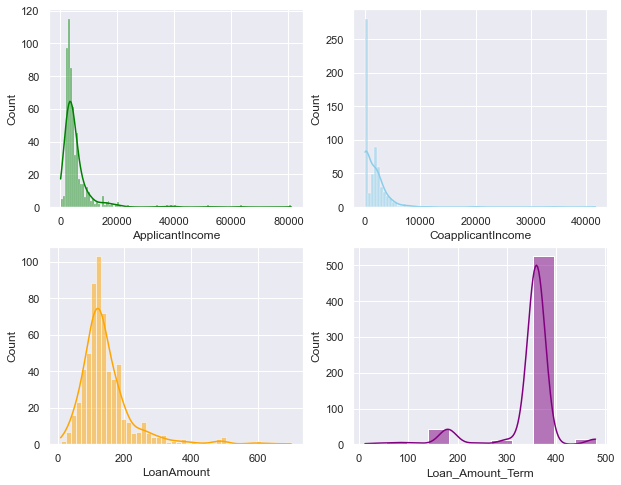

In [26]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=train, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=train, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=train, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');
sns.histplot(data=train, x="Loan_Amount_Term", kde=True, ax=axs[1, 1], color='purple');

# Box plot

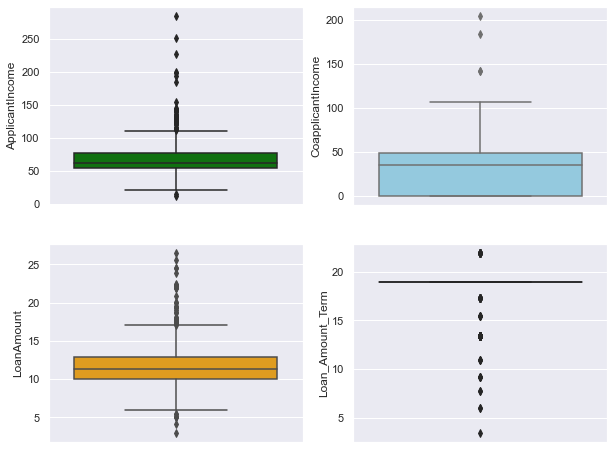

In [87]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.boxplot(data=train, y="ApplicantIncome", ax=axs[0, 0], color='green')
sns.boxplot(data=train, y="CoapplicantIncome", ax=axs[0, 1], color='skyblue')
sns.boxplot(data=train, y="LoanAmount", ax=axs[1, 0], color='orange')
sns.boxplot(data=train, y="Loan_Amount_Term", ax=axs[1, 1], color='purple');

# Skewed Distribution Treatment

In [28]:
# Squre root transformation

train.ApplicantIncome = np.sqrt(train.ApplicantIncome)
train.CoapplicantIncome = np.sqrt(train.CoapplicantIncome)
train.LoanAmount = np.sqrt(train.LoanAmount)
train.Loan_Amount_Term = np .sqrt(train.Loan_Amount_Term)

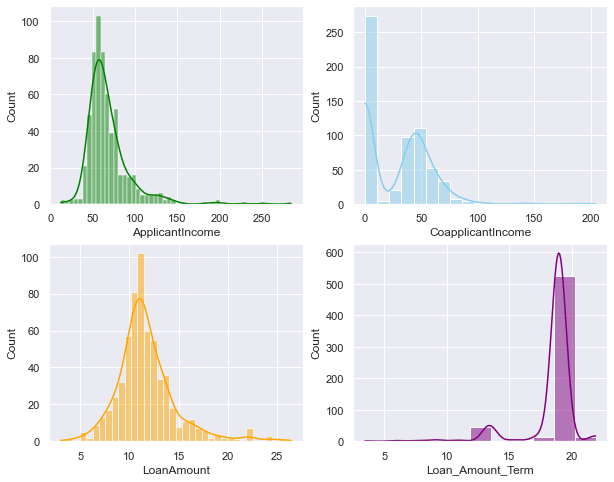

In [29]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=train, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=train, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=train, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');
sns.histplot(data=train, x="Loan_Amount_Term", kde=True, ax=axs[1, 1], color='purple');

# Label Encoding

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
lb = LabelEncoder()
train['Gender'] = lb.fit_transform(train['Gender'])
train['Married'] = lb.fit_transform(train['Married'])
train['Education'] = lb.fit_transform(train['Education'])
train['Self_Employed'] = lb.fit_transform(train['Self_Employed'])
train['Property_Area'] = lb.fit_transform(train['Property_Area'])

In [51]:
# seprating the data in x and y
x=train.drop(columns='Loan_Status', axis=1)

In [53]:
train["Dependents"].replace('3+','4',inplace=True)

In [54]:
y=train.Loan_Status

# Spliting the data for training and testing

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3,random_state=21,stratify=y)

In [57]:
print(x.shape,x_train.shape,x_test.shape)

(614, 11) (429, 11) (185, 11)


# Building Machine Learning Models. 

# 1. Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score

In [59]:
log_model = LogisticRegression(max_iter=150, solver="liblinear") #'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs'
log_model.fit(x_train,y_train)

log_prediction = log_model.predict(x_test)

print(classification_report(log_prediction, y_test))
print( confusion_matrix(log_prediction,y_test))

log_acc = accuracy_score(log_prediction,y_test)
print("Logistic Regression accuracy_score: {:.2f}% ". format(log_acc*100))

              precision    recall  f1-score   support

           N       0.45      1.00      0.62        26
           Y       1.00      0.80      0.89       159

    accuracy                           0.83       185
   macro avg       0.72      0.90      0.75       185
weighted avg       0.92      0.83      0.85       185

[[ 26   0]
 [ 32 127]]
Logistic Regression accuracy_score: 82.70% 


# 2. Support Vector Machine

In [60]:
from sklearn.svm import SVC

In [61]:
svm_model = SVC(kernel="rbf",gamma ='auto', C = 6) #'linear', 'poly', 'rbf', 'sigmoid', 'precomputed' # auto,scale
svm_model.fit(x_train, y_train)

svm_prediction = svm_model.predict(x_test)

print(classification_report(svm_prediction,y_test))
print(confusion_matrix(svm_prediction,y_test))

svm_acc = accuracy_score(svm_prediction,y_test)
print("SVM accuracy_score : {:.2f}%".format(svm_acc*100))

              precision    recall  f1-score   support

           N       0.24      0.48      0.32        29
           Y       0.88      0.72      0.79       156

    accuracy                           0.68       185
   macro avg       0.56      0.60      0.56       185
weighted avg       0.78      0.68      0.72       185

[[ 14  15]
 [ 44 112]]
SVM accuracy_score : 68.11%


# 3. Decision Tree

In [62]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
dt_model = DecisionTreeClassifier(criterion='gini',splitter = "random")
dt_model.fit(x_train,y_train)

dt_prediction = dt_model.predict(x_test)

print(classification_report(dt_prediction, y_test))
print( confusion_matrix(dt_prediction,y_test))

dt_acc = accuracy_score(dt_prediction,y_test)
print("Decision_tree accuracy_score: {:.2f}% ". format(dt_acc*100))

              precision    recall  f1-score   support

           N       0.50      0.60      0.55        48
           Y       0.85      0.79      0.82       137

    accuracy                           0.74       185
   macro avg       0.68      0.70      0.68       185
weighted avg       0.76      0.74      0.75       185

[[ 29  19]
 [ 29 108]]
Decision_tree accuracy_score: 74.05% 


# 4. Random Forest Classifier.

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
rf_model = RandomForestClassifier(criterion='entropy', n_estimators=120)
rf_model.fit(x_train,y_train)

rf_prediction = rf_model.predict(x_test)

print(classification_report(rf_prediction, y_test))
print( confusion_matrix(rf_prediction,y_test))

rf_acc = accuracy_score(rf_prediction,y_test)
print("Random_forest accuracy_score: {:.2f}% ". format(rf_acc*100))

              precision    recall  f1-score   support

           N       0.50      0.91      0.64        32
           Y       0.98      0.81      0.89       153

    accuracy                           0.83       185
   macro avg       0.74      0.86      0.77       185
weighted avg       0.89      0.83      0.84       185

[[ 29   3]
 [ 29 124]]
Random_forest accuracy_score: 82.70% 


# 5. K- Nearest Neighbors (KNN).

In [66]:
from sklearn.neighbors import KNeighborsClassifier

In [67]:
knn_model = KNeighborsClassifier(n_neighbors=13)
knn_model.fit(x_train,y_train)

knn_prediction = knn_model.predict(x_test)

print(classification_report(knn_prediction, y_test))
print( confusion_matrix(knn_prediction,y_test))

knn_acc = accuracy_score(knn_prediction,y_test)
print("KNN accuracy_score: {:.2f}% ". format(knn_acc*100))

              precision    recall  f1-score   support

           N       0.07      0.50      0.12         8
           Y       0.97      0.69      0.81       177

    accuracy                           0.69       185
   macro avg       0.52      0.60      0.47       185
weighted avg       0.93      0.69      0.78       185

[[  4   4]
 [ 54 123]]
KNN accuracy_score: 68.65% 


# Model Comparison.

In [68]:
compare_model = pd.DataFrame({'Model': ['Logistic Regression',"Support Vector Machine", "Decision Tree", 
                             "Random Forest", "K-Nearest Neighbour"],
                  'Accuracy_Score': [log_acc*100,svm_acc*100,dt_acc*100,rf_acc*100,knn_acc*100]})


compare_model.sort_values(by='Accuracy_Score', ascending=False)

,Model,Accuracy_Score
0,Logistic Regression,82.702703
3,Random Forest,82.702703
2,Decision Tree,74.054054
4,K-Nearest Neighbour,68.648649
1,Support Vector Machine,68.108108


# Performing EDA on Testing data

In [69]:
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [70]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [71]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [72]:
total1 = test.isnull().sum().sort_values(ascending=False)

In [73]:
percent1 = test.isnull().sum()/test.isnull().count().sort_values(ascending=False)

In [74]:
missing_values1 = pd.concat([total1,percent1*100],axis=1, keys=["Total1","Percent1"])
missing_values1

,Total1,Percent1
Credit_History,29,7.901907
Self_Employed,23,6.267030
Gender,11,2.997275
Dependents,10,2.724796
Loan_Amount_Term,6,1.634877
LoanAmount,5,1.362398
Loan_ID,0,0.000000
Married,0,0.000000
Education,0,0.000000
ApplicantIncome,0,0.000000


In [75]:
test["Gender"] = test["Gender"].fillna(test["Gender"].dropna().mode().values[0])

In [76]:
test["Dependents"] = test["Dependents"].fillna(
test["Dependents"].dropna().mode().values[0])

In [77]:
test["Credit_History"] = test["Credit_History"].fillna(
test["Credit_History"].dropna().mode().values[0])

In [78]:
test["Self_Employed"] = test["Self_Employed"].fillna(
test["Self_Employed"].dropna().mode().values[0])

In [79]:
test["LoanAmount"] = test["LoanAmount"].fillna(
test["LoanAmount"].dropna().median())

In [80]:
test["Loan_Amount_Term"] = test["Loan_Amount_Term"].fillna(
test["Loan_Amount_Term"].dropna().mode().values[0])

In [81]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [82]:
test.duplicated().sum()

0

# Droping unecessary columns from test data

In [83]:
test.drop(columns = ['Loan_ID'],axis=1,inplace=True)
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


# Histigram Distribution for test data

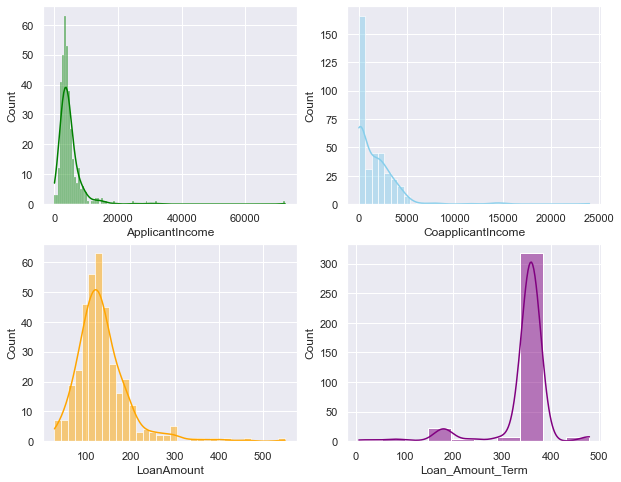

In [84]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=test, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=test, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=test, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');
sns.histplot(data=test, x="Loan_Amount_Term", kde=True, ax=axs[1, 1], color='purple');

# Box plot

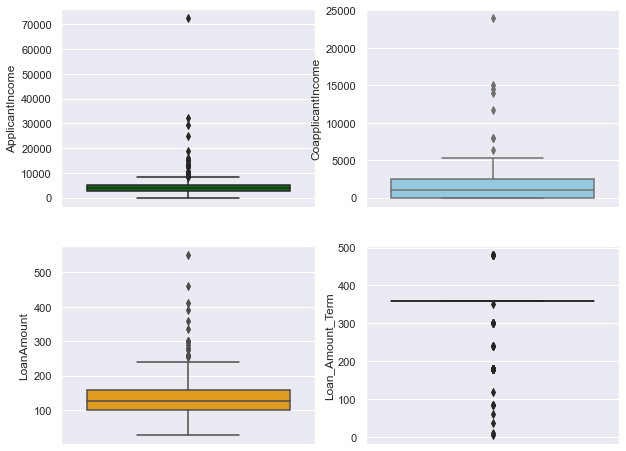

In [86]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.boxplot(data=test, y="ApplicantIncome", ax=axs[0, 0], color='green')
sns.boxplot(data=test, y="CoapplicantIncome", ax=axs[0, 1], color='skyblue')
sns.boxplot(data=test, y="LoanAmount", ax=axs[1, 0], color='orange')
sns.boxplot(data=test, y="Loan_Amount_Term", ax=axs[1, 1], color='purple');

# Skewed Distribution Treatment

In [88]:
# Squre root transformation

test.ApplicantIncome = np.sqrt(test.ApplicantIncome)
test.CoapplicantIncome = np.sqrt(test.CoapplicantIncome)
test.LoanAmount = np.sqrt(test.LoanAmount)
test.Loan_Amount_Term = np .sqrt(test.Loan_Amount_Term)

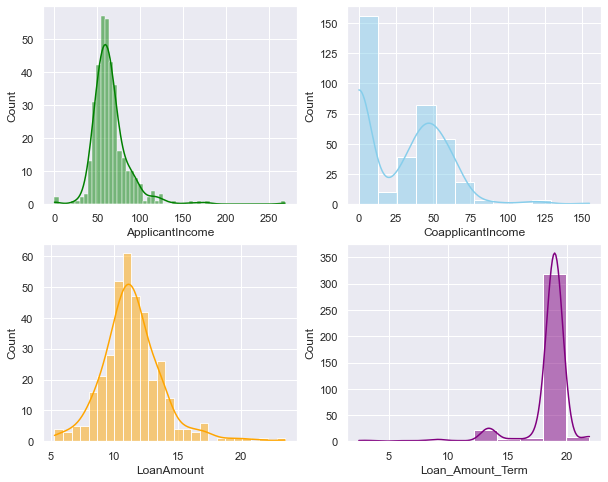

In [89]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=test, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=test, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=test, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');
sns.histplot(data=test, x="Loan_Amount_Term", kde=True, ax=axs[1, 1], color='purple');

# Label Encoding on test data

In [90]:
lb = LabelEncoder()
test['Gender'] = lb.fit_transform(test['Gender'])
test['Married'] = lb.fit_transform(test['Married'])
test['Education'] = lb.fit_transform(test['Education'])
test['Self_Employed'] = lb.fit_transform(test['Self_Employed'])
test['Property_Area'] = lb.fit_transform(test['Property_Area'])

In [93]:
test['Dependents'].value_counts()

0     210
2      59
1      58
3+     40
Name: Dependents, dtype: int64

In [94]:
test["Dependents"].replace('3+','4',inplace=True)

In [95]:
test['Dependents'].value_counts()

0    210
2     59
1     58
4     40
Name: Dependents, dtype: int64

# Building Machine Learning Models for test data

# 1. Logistic Regression

In [138]:
a = log_model.predict(test)
a = pd.DataFrame({'approval_LR': log_model.predict(test)})
a.value_counts()

approval_LR
Y              308
N               59
dtype: int64

# 2. K-Nearest Neighbors(KNN)

In [139]:
b = knn_model.predict(test)
b = pd.DataFrame({'approval_KNN': knn_model.predict(test)})
b.value_counts()

approval_KNN
Y               354
N                13
dtype: int64

# 3. Ramdom Forest

In [140]:
c = rf_model.predict(test)
c = pd.DataFrame({'approval_RF': rf_model.predict(test)})
c.value_counts()

approval_RF
Y              298
N               69
dtype: int64

# 4. Decision Tree

In [141]:
d = dt_model.predict(test)
d = pd.DataFrame({'approval_DT': dt_model.predict(test)})
d.value_counts()

approval_DT
Y              271
N               96
dtype: int64

# 5. Support Vector Machine

In [142]:
e = svm_model.predict(test)
e = pd.DataFrame({'approval_SVM': svm_model.predict(test)})
e.value_counts()

approval_SVM
Y               308
N                59
dtype: int64

In [143]:
test_new = pd.concat([test, a,b,c,d,e],axis=1)
test_new

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,approval_LR,approval_KNN,approval_RF,approval_DT,approval_SVM
0,1,1,0,0,0,75.630682,0.000000,10.488088,18.973666,1.0,2,Y,Y,Y,Y,Y
1,1,1,1,0,0,55.461698,38.729833,11.224972,18.973666,1.0,2,Y,Y,Y,Y,Y
2,1,1,2,0,0,70.710678,42.426407,14.422205,18.973666,1.0,2,Y,Y,Y,Y,Y
3,1,1,2,0,0,48.373546,50.457903,10.000000,18.973666,1.0,2,Y,Y,Y,Y,Y
4,1,0,0,1,0,57.236352,0.000000,8.831761,18.973666,1.0,2,Y,Y,Y,Y,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,1,1,4,1,1,63.316664,42.154478,10.630146,18.973666,1.0,2,Y,Y,Y,Y,Y
363,1,1,0,0,0,64.482556,26.627054,10.723805,18.973666,1.0,2,Y,Y,Y,N,Y
364,1,0,0,0,0,57.008771,44.643029,11.224972,18.973666,1.0,1,Y,Y,Y,Y,N
365,1,1,0,0,0,70.710678,48.918299,12.569805,18.973666,1.0,0,Y,Y,N,N,Y
